In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from itertools import dropwhile
from tc_utils import compile_csv, get_all_fits, create_tc_csv
from tc_tools import get_parameters, get_func_type

In [12]:
home_dir = os.path.dirname(os.path.abspath("makeplots.ipynb"))
lib_dir = home_dir+f'{os.sep}lib'

In [13]:
for folder_name in os.listdir(lib_dir):
    folder_path = os.path.join(lib_dir, folder_name)
    if os.path.isdir(folder_path):
        # print(f"Folder: {folder_path}")
        paths = get_all_fits(folder_path)
        # print(paths)
        csv = compile_csv(paths, folder_name)
        create_tc_csv(csv, f"{folder_path}{os.sep}all_fits.csv")

c:\Users\henac\OneDrive - The University of Texas at Austin\01_RESEARCH\05_CMBS4\Cryogenic_Material_Properties\thermal_conductivity\fit_types.py:59: RuntimeWarning: divide by zero encountered in log10
  return 10**np.polyval(param, np.log10(T))
c:\Users\henac\miniconda3\envs\ENAPenv\Lib\site-packages\numpy\lib\polynomial.py:780: RuntimeWarning: invalid value encountered in multiply
  y = y * x + pv
c:\Users\henac\OneDrive - The University of Texas at Austin\01_RESEARCH\05_CMBS4\Cryogenic_Material_Properties\thermal_conductivity\fit_types.py:59: RuntimeWarning: overflow encountered in power
  return 10**np.polyval(param, np.log10(T))
c:\Users\henac\OneDrive - The University of Texas at Austin\01_RESEARCH\05_CMBS4\Cryogenic_Material_Properties\thermal_conductivity\fit_types.py:87: RuntimeWarning: divide by zero encountered in log10
  erf_low = 0.5*(1-erf(erf_multiplicity*(np.log10((T)/erf_param))))
c:\Users\henac\OneDrive - The University of Texas at Austin\01_RESEARCH\05_CMBS4\Cryogenic

TypeError encountered when evaluating OFHC_RRR_Wc with parameters for OFHC_RRR. Skipping this fit.
Error encountered when evaluating power_law, function type not yet supported. Skipping this fit.


c:\Users\henac\miniconda3\envs\ENAPenv\Lib\site-packages\matplotlib\scale.py:255: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


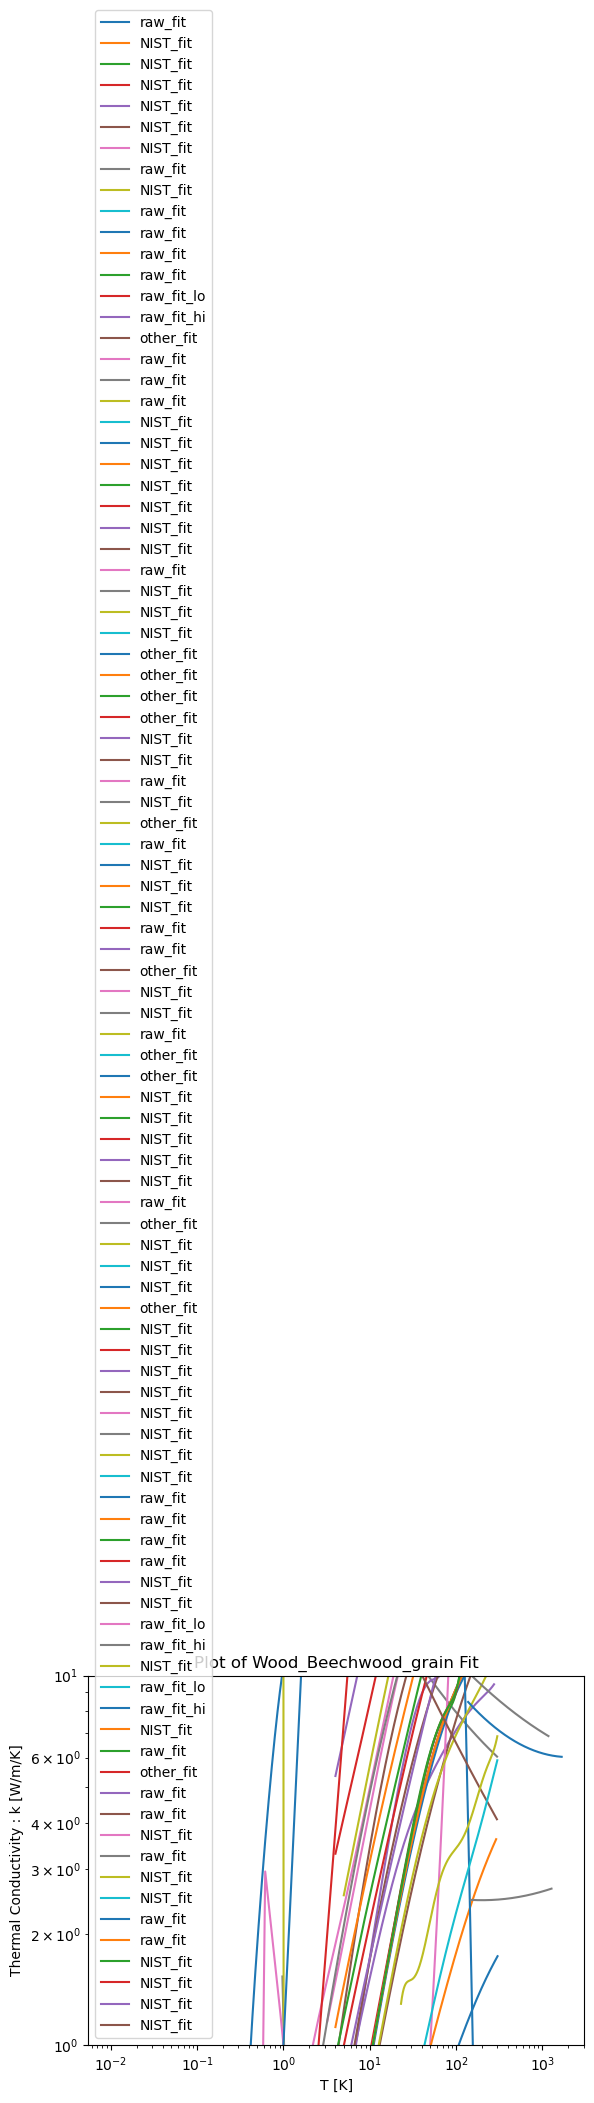

In [14]:
plotting = True
if plotting:
    for folder_name in os.listdir(lib_dir):
        folder_path = os.path.join(lib_dir, folder_name)
        if os.path.isdir(folder_path):
            TCdata = np.loadtxt(f"{folder_path}{os.sep}all_fits.csv", dtype=str, delimiter=',') #
            # print(np.shape(TCdata), TCdata)
            for i in range(1, len(TCdata)):
                # print(i)
                mat_parameters = get_parameters(TCdata, index = i) # get the parameters for the first material in the array (assumes all materials have same fit type)
                # print(parameters)

                try:
                    func_type = get_func_type(mat_parameters["fit_type"])
                    fit_range = mat_parameters["fit_range"]
                    # Let's make our plotting range the listed fit range
                    T_range = np.linspace(fit_range[0], fit_range[1], 1000)

                    # Now let's use the fit to get the thermal conductivity values over the range
                    # Luckily, every function type is defined in such a way to readily accept the parameter dictionary as it was defined above
                    try:
                        y_vals = func_type(T_range, mat_parameters)
                        # Plotting
                        plt.plot(T_range, y_vals, label=TCdata[i,0]) # Plot the fit line for the material
                        plt.semilogy()
                        plt.semilogx()
                        plt.title(f"Plot of {folder_name} Fit")
                        plt.xlabel("T [K]")
                        plt.ylabel("Thermal Conductivity : k [W/m/K]")
                        plt.grid()
                        plt.legend(loc='best') # Add legend to the plot for the material name or folder name if not specified in the dictionary
                    except TypeError:
                        print(f"TypeError encountered when evaluating {func_type.__name__} with parameters for {folder_name}. Skipping this fit.")
                except:
                    print(f"Error encountered when evaluating {func_type.__name__}, function type not yet supported. Skipping this fit.")
                    pass
            # plt.savefig(f"{folder_path}{os.sep}plots{os.sep}{folder_name}_all_fits.pdf", dpi=300) # Save the figure to the folder of the material
            # plt.show()


OFHC_RRR
[['Material Name' 'Fit Type' 'Low Temp' 'High Temp' 'Perc Err' 'a' 'b'
  'c' 'd' 'e' 'f' 'g' 'h' 'i' 'a1' 'a2' 'a3' 'a4' 'a5' 'a6' 'a7' 'a8'
  'a9' 'a10' 'a11' 'a12']
 ['NIST_fit' 'OFHC_RRR_Wc' '0.2' '1250' '??' '0.631' '1.754e-08' '2.763'
  '1102' '-0.165' '70' '1.765' '0.2351' '0.1661' '-0.00012' '420' '470'
  '0.7' '-0.00016' '73' '87' '0.45' '-0.000010' '18' '21' '0.5']]
<function OFHC_RRR_Wc at 0x0000023965646F20>
[2.00e-01 1.25e+03]
<function OFHC_RRR_Wc at 0x0000023965646F20>
[2.00e-01 1.25e+03]
<function OFHC_RRR_Wc at 0x0000023965646F20>
[2.00e-01 1.25e+03]
<function OFHC_RRR_Wc at 0x0000023965646F20>
[2.00e-01 1.25e+03]


c:\Users\henac\OneDrive - The University of Texas at Austin\01_RESEARCH\05_CMBS4\Cryogenic_Material_Properties\thermal_conductivity\fit_types.py:484: RuntimeWarning: divide by zero encountered in divide
  return (params[0]/((RRR-1)*t))
c:\Users\henac\OneDrive - The University of Texas at Austin\01_RESEARCH\05_CMBS4\Cryogenic_Material_Properties\thermal_conductivity\fit_types.py:494: RuntimeWarning: invalid value encountered in multiply
  return ((params[7]*((RRR-1)**params[8])*w_i*w_0)/(w_i+w_0))


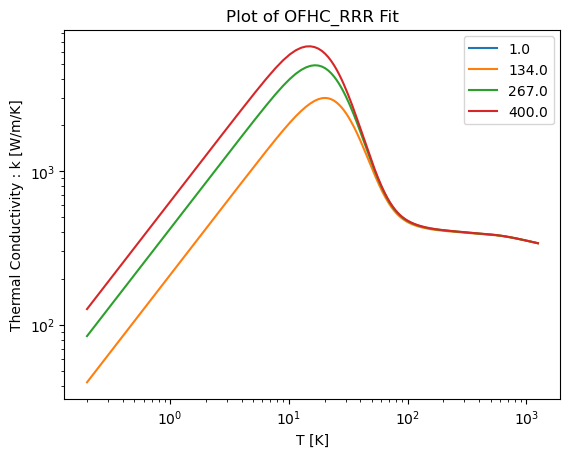

In [15]:
folder_name = "OFHC_RRR"
folder_path = os.path.join(lib_dir, folder_name)
print(folder_name)
if os.path.isdir(folder_path):
    TCdata = np.loadtxt(f"{folder_path}{os.sep}all_fits.csv", dtype=str, delimiter=',') #
    # print(np.shape(TCdata), TCdata)
    print(TCdata)
    RRR_vals = np.linspace(1, 400, 4)
    for i in range(len(RRR_vals)):
        # print(i)
        mat_parameters = get_parameters(TCdata, index = 1) # get the parameters for the first material in the array (assumes all materials have same fit type)
        # print(parameters)

        
        func_type = get_func_type(mat_parameters["fit_type"])
        print(func_type)
        fit_range = mat_parameters["fit_range"]
        print(fit_range)
        # Let's make our plotting range the listed fit range
        T_range = np.linspace(fit_range[0], fit_range[1], 1000)

        # Now let's use the fit to get the thermal conductivity values over the range
        # Luckily, every function type is defined in such a way to readily accept the parameter dictionary as it was defined above
        
        y_vals = func_type(T_range, [RRR_vals[i]], mat_parameters)
        # Plotting
        plt.plot(T_range, y_vals, label=RRR_vals[i]) # Plot the fit line for the material
        plt.semilogy()
        plt.semilogx()
        plt.title(f"Plot of {folder_name} Fit")
        plt.xlabel("T [K]")
        plt.ylabel("Thermal Conductivity : k [W/m/K]")
        plt.grid()
        plt.legend(loc='best') # Add legend to the plot for the material name or folder name if not specified in the dictionary
        
    plt.savefig(f"{folder_path}{os.sep}plots{os.sep}{folder_name}_all_fits.pdf", dpi=300) # Save the figure to the folder of the material
    plt.show()